# import

In [1]:
!pip install squarify
!pip install category_encoders
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Core Libraries
import pandas as pd
import numpy as np
from scipy import stats
import random
import warnings

# Visualization Libraries
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import squarify
%matplotlib inline

# Machine Learning Libraries
from category_encoders import TargetEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.ensemble import IsolationForest
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier, HistGradientBoostingClassifier

# Set random seed
rs = 42

# Ignore warnings
warnings.filterwarnings("ignore")

# Set color palette for Seaborn
colors= ['#1c76b6', '#a7dae9', '#eb6a20', '#f59d3d', '#677fa0', '#d6e4ed', '#f7e9e5']
sns.set_palette(colors)

#1. 데이터의 불러오기

In [116]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
sub=pd.read_csv('sample_submission.csv')

In [117]:
test

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
2,140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
3,140703,Nalini,Female,23.0,Rajkot,Student,NaN,5.0,NaN,6.84,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
4,140704,Shaurya,Male,47.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93795,234495,Zoya,Female,49.0,Jaipur,Working Professional,Pilot,NaN,3.0,NaN,NaN,5.0,Less than 5 hours,Moderate,BSc,Yes,2.0,2.0,Yes
93796,234496,Shlok,Male,29.0,Ahmedabad,Working Professional,Pilot,NaN,5.0,NaN,NaN,1.0,7-8 hours,Moderate,BE,Yes,11.0,3.0,Yes
93797,234497,Rishi,Male,24.0,Visakhapatnam,Student,NaN,1.0,NaN,7.51,4.0,NaN,7-8 hours,Moderate,B.Tech,No,7.0,1.0,No
93798,234498,Eshita,Female,23.0,Kalyan,Working Professional,Marketing Manager,NaN,4.0,NaN,NaN,2.0,5-6 hours,Healthy,BA,Yes,7.0,5.0,Yes


In [118]:
train.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [119]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

#2.데이터 읽기

In [120]:
train.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [121]:
train.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,70349.500000,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,40616.735775,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,0.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,35174.750000,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,70349.500000,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,105524.250000,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,140699.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


In [122]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [123]:
train.duplicated().value_counts()

,count
False,140700


In [124]:
print(train['Working Professional or Student'].unique())

['Working Professional' 'Student']


In [125]:
print(train['Degree'].unique())

['BHM' 'LLB' 'B.Pharm' 'BBA' 'MCA' 'MD' 'BSc' 'ME' 'B.Arch' 'BCA' 'BE'
 'MA' 'B.Ed' 'B.Com' 'MBA' 'M.Com' 'MHM' 'BA' 'Class 12' 'M.Tech' 'PhD'
 'M.Ed' 'MSc' 'B.Tech' 'LLM' 'MBBS' 'M.Pharm' 'UX/UI Designer' 'MPA' 'BH'
 'Nalini' 'BEd' 'B.Sc' 'Veda' 'Bhopal' 'S.Tech' 'Degree' '20' 'Class 11'
 'H_Pharm' 'M' 'P.Com' 'BPharm' 'Business Analyst' 'M.Arch' 'LL.Com'
 'Data Scientist' 'MPharm' 'L.Ed' 'P.Pharm' 'Kalyan' 'Unite' 'BArch'
 'HR Manager' 'Badhya' 'S.Pharm' 'LLBA' 'Vrinda' 'M. Business Analyst'
 'Bhavesh' '0' 'LLCom' '29' 'MTech' 'Vivaan' 'BPA' 'Plumber' '5.61' 'Brit'
 'B.03' 'Ritik' '5.56' 'MEd' 'B' 'B BA' '7.06' 'B.B.Arch' 'ACA' 'Brithika'
 'CGPA' '24' 'M_Tech' 'Pihu' 'BB' 'Jhanvi' 'LLTech' 'Aarav' 'Entrepreneur'
 '8.56' 'LHM' 'Lata' 'S.Arch' 'Marsh' 'HCA' '5.88' 'B.Student' 'LL B.Ed'
 'M.S' 'Navya' 'Mahika' nan 'K.Ed' 'B.3.79' 'Mthanya'
 'Working Professional' 'Esha' 'LLS' 'LLEd' 'E.Tech' 'Doctor' 'N.Pharm'
 'LCA' 'B B.Com' 'RCA' 'Mihir' 'Advait']


In [126]:
print(train['Gender'].unique())

['Female' 'Male']


In [127]:
print(train['Have you ever had suicidal thoughts ?'].unique())

['No' 'Yes']


# 전처리

## 수면시간 전처리

In [128]:
sleep_mapping = {
    'More than 8 hours': 9.0,
    'Less than 5 hours': 4.5,
    'than 5 hours': 4.5,
    '5-6 hours': 5.5,
    '6-7 hours': 7.5,
    '6-8 hours': 7.5,
    '7-8 hours': 7.5,
    '8-9 hours': 9.0,
    '9-11 hours': 9.0,
    '10-11 hours': 9.0,
    '9-5': 7.5,
    '9-5 hours': 7.5,
    '10-6 hours': 9.0,
    '1-2 hours': 4.5,
    '2-3 hours': 4.5,
    '3-4 hours': 4.5,
    '4-5 hours': 4.5,
    '4-6 hours': 5.5,
    '1-3 hours': 4.5,
    '3-6 hours': 4.5,
    '1-6 hours': 4.5,
    '8 hours': 7.5,
    '45': 7.5,
    '49 hours': 7.5,
    '35-36 hours': 5.5,
    '40-45 hours': 7.5,
    '45-48 hours': 7.5,
    '55-66 hours': 9.0,
}

In [129]:
train['Sleep Hours'] = train['Sleep Duration'].map(sleep_mapping)
test['Sleep Hours'] = test['Sleep Duration'].map(sleep_mapping)

In [130]:
train['Sleep Hours'] = train['Sleep Hours'].fillna(7.5)
test['Sleep Hours'] = test['Sleep Hours'].fillna(7.5)

## 식습관 전처리

In [131]:
diet_map = {
    'Healthy': 3,
    'More Healthy': 3,

    'Unhealthy': 1,
    'Less Healthy': 1,
    'No Healthy': 1,
    'Hormonal': 1,

    'Moderate': 2,
    'Less than Healthy': 2
}
# healthy :3 , unhealthy: 1, moderate: 2
# 정제된 컬럼 생성
train['Dietary_Category'] = train['Dietary Habits'].map(diet_map)
test['Dietary_Category'] = test['Dietary Habits'].map(diet_map)

In [132]:
print(train['Dietary_Category'].isna().sum())
print(test['Dietary_Category'].isna().sum())


21
27


In [133]:
train['Dietary_Category'] = train['Dietary_Category'].fillna(2)
test['Dietary_Category'] = test['Dietary_Category'].fillna(2)

## 도시데이터 전처리

In [134]:
green_space_per_capita = {
    'Ludhiana': 0.8,
    'Varanasi': 24.78,
    'Visakhapatnam': 0.18,
    'Mumbai': 9.36,
    'Kanpur': 1.3,
    'Ahmedabad': 9.38,
    'Thane': 35,
    'Nashik': 8,
    'Bangalore': 3.31,
    'Patna': 2,
    'Rajkot': 15,
    'Jaipur': 6.67,
    'Pune': 17,
    'Lucknow': 7,
    'Meerut': 3,
    'Agra': 18,
    'Surat': 5.90,
    'Faridabad': 3,
    'Hyderabad': 8.2,
    'Srinagar': 2.6,
    'Ghaziabad': 1.5,
    'Kolkata': 6.61,
    'Chennai': 18.05,
    'Kalyan': 2,
    'Nagpur': 17.49,
    'Vadodara': 8,
    'Vasai-Virar': 15,
    'Delhi': 10.41,
    'Bhopal': 18.62,
    'Indore': 20,
    'Morena': 30
}

population_density = {
    'Ludhiana': 9781,
    'Varanasi': 2367,
    'Visakhapatnam': 3900,
    'Mumbai': 20482,
    'Kanpur': 14449,
    'Ahmedabad': 11975,
    'Thane': 11500,
    'Nashik': 5872,
    'Bangalore': 4381,
    'Patna': 11667,
    'Rajkot': 10195,
    'Jaipur': 6491,
    'Pune': 6039,
    'Lucknow': 5459,
    'Meerut': 8493,
    'Agra': 11300,
    'Surat': 13600,
    'Faridabad': 9233,
    'Hyderabad': 10859,
    'Srinagar': 5283,
    'Ghaziabad': 10341,
    'Kolkata': 24306,
    'Chennai': 26903,
    'Kalyan': 11620,
    'Nagpur': 11470,
    'Vadodara': 8775,
    'Vasai-Virar': 9962,
    'Delhi': 11320,
    'Bhopal': 7154,
    'Indore': 11250,
    'Morena': 2340
}

In [135]:
train['GreenSpace'] = train['City'].map(green_space_per_capita)
train['PopulationDensity'] = train['City'].map(population_density)

test['GreenSpace'] = test['City'].map(green_space_per_capita)
test['PopulationDensity'] = test['City'].map(population_density)

In [136]:
train['GreenSpace'].fillna(train['GreenSpace'].mean(), inplace=True)
train['PopulationDensity'].fillna(train['PopulationDensity'].mean(), inplace=True)

test['GreenSpace'].fillna(test['GreenSpace'].mean(), inplace=True)
test['PopulationDensity'].fillna(test['PopulationDensity'].mean(), inplace=True)

In [137]:
green_space_per_capita = {
    'Ludhiana': 0.8,
    'Varanasi': 24.78,
    'Visakhapatnam': 0.18,
    'Mumbai': 9.36,
    'Kanpur': 1.3,
    'Ahmedabad': 9.38,
    'Thane': 35,
    'Nashik': 8,
    'Bangalore': 3.31,
    'Patna': 2,
    'Rajkot': 15,
    'Jaipur': 6.67,
    'Pune': 17,
    'Lucknow': 7,
    'Meerut': 3,
    'Agra': 18,
    'Surat': 5.90,
    'Faridabad': 3,
    'Hyderabad': 8.2,
    'Srinagar': 2.6,
    'Ghaziabad': 1.5,
    'Kolkata': 6.61,
    'Chennai': 18.05,
    'Kalyan': 2,
    'Nagpur': 17.49,
    'Vadodara': 8,
    'Vasai-Virar': 15,
    'Delhi': 10.41,
    'Bhopal': 18.62,
    'Indore': 20,
    'Morena': 30
}

population_density = {
    'Ludhiana': 9781,
    'Varanasi': 2367,
    'Visakhapatnam': 3900,
    'Mumbai': 20482,
    'Kanpur': 14449,
    'Ahmedabad': 11975,
    'Thane': 11500,
    'Nashik': 5872,
    'Bangalore': 4381,
    'Patna': 11667,
    'Rajkot': 10195,
    'Jaipur': 6491,
    'Pune': 6039,
    'Lucknow': 5459,
    'Meerut': 8493,
    'Agra': 11300,
    'Surat': 13600,
    'Faridabad': 9233,
    'Hyderabad': 10859,
    'Srinagar': 5283,
    'Ghaziabad': 10341,
    'Kolkata': 24306,
    'Chennai': 26903,
    'Kalyan': 11620,
    'Nagpur': 11470,
    'Vadodara': 8775,
    'Vasai-Virar': 9962,
    'Delhi': 11320,
    'Bhopal': 7154,
    'Indore': 11250,
    'Morena': 2340
}

df_students['GreenSpace'] = df_students['City'].map(green_space_per_capita)
df_students['PopulationDensity'] = df_students['City'].map(population_density)

# 3. 시각화


## 수면과 식습관

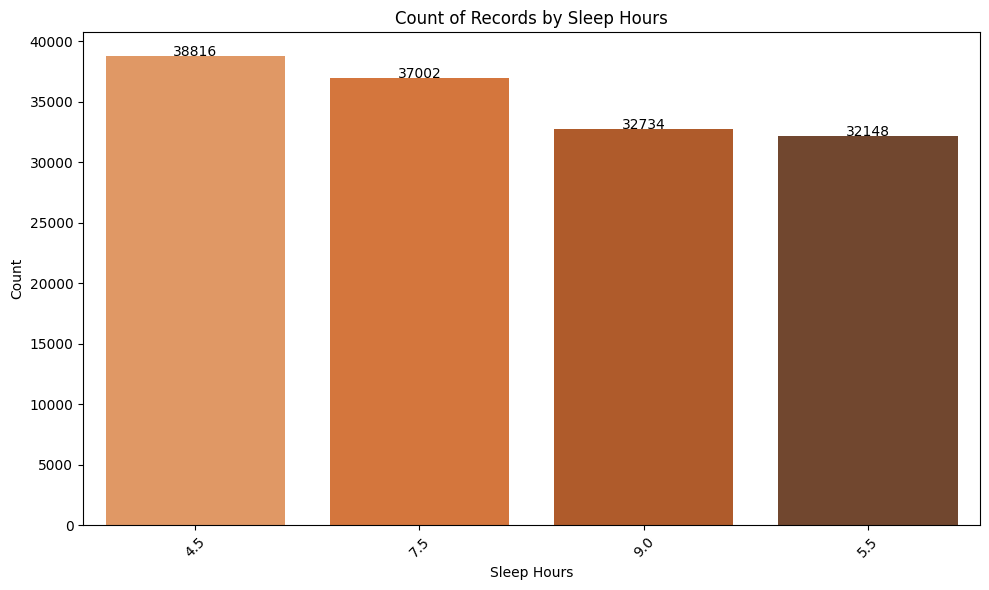

In [138]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=train,
                   x='Sleep Hours',
                   order=train['Sleep Hours'].value_counts().index,
                   palette='Oranges_d')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,  # 막대의 가운데
            height + 1,                      # 막대 위에 살짝 띄우기
            int(height),                     # 정수형으로 표시
            ha="center", fontsize=10)

plt.title('Count of Records by Sleep Hours')
plt.xlabel('Sleep Hours')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

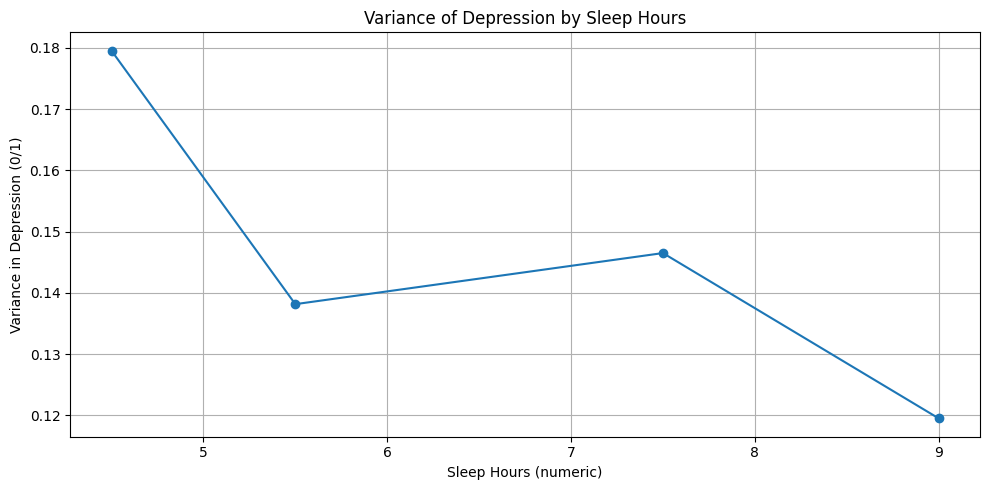

In [139]:
variance_by_sleep_num = train.groupby('Sleep Hours')['Depression'].var().sort_index()
plt.figure(figsize=(10, 5))
variance_by_sleep_num.plot(marker='o')
plt.title('Variance of Depression by Sleep Hours')
plt.xlabel('Sleep Hours (numeric)')
plt.ylabel('Variance in Depression (0/1)')
plt.grid(True)
plt.tight_layout()
plt.show()

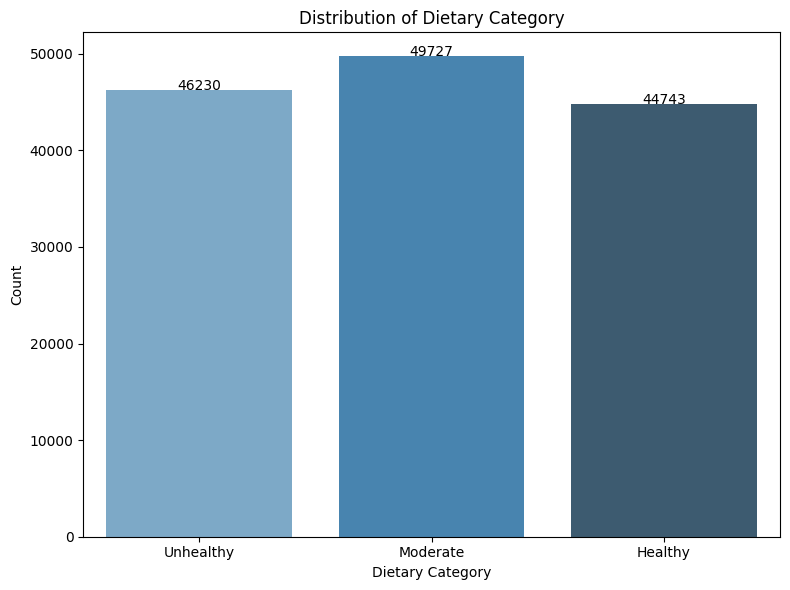

In [140]:
# prompt: Dietary_Category 분포

plt.figure(figsize=(8, 6))
ax = sns.countplot(data=train, x='Dietary_Category', palette='Blues_d')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 5,
            int(height),
            ha="center", fontsize=10)

plt.title('Distribution of Dietary Category')
plt.xlabel('Dietary Category')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Unhealthy', 'Moderate', 'Healthy']) # Assuming 1: Unhealthy, 2: Moderate, 3: Healthy based on the mapping
plt.tight_layout()
plt.show()

Proportion of Depression by Dietary Category:
   Dietary_Category  Depression_Proportion
0               1.0               0.260545
1               2.0               0.165725
2               3.0               0.118030


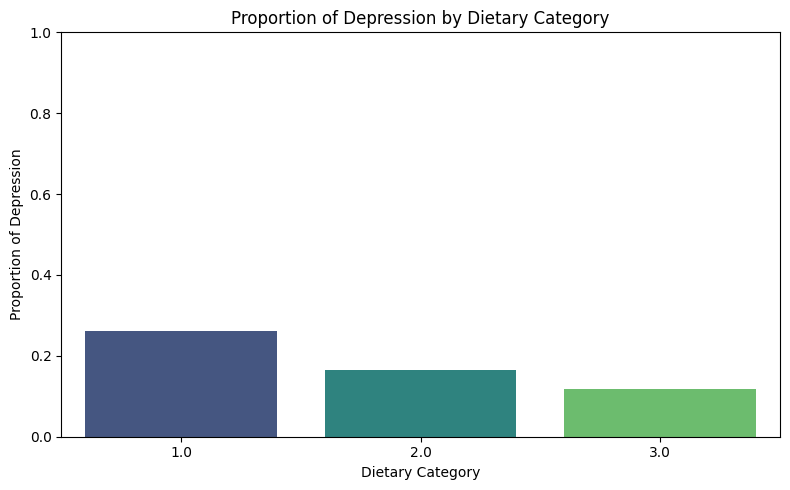

In [141]:
# Group by 'Dietary_Category' and calculate the mean of 'Depression' (which represents the proportion)
depression_proportion_by_diet = train.groupby('Dietary_Category')['Depression'].mean().reset_index()

# Rename the 'Depression' column to make it clearer that it's a proportion
depression_proportion_by_diet = depression_proportion_by_diet.rename(columns={'Depression': 'Depression_Proportion'})

print("Proportion of Depression by Dietary Category:")
print(depression_proportion_by_diet)

# Visualize the proportion
plt.figure(figsize=(8, 5))
sns.barplot(x='Dietary_Category', y='Depression_Proportion', data=depression_proportion_by_diet, palette='viridis')
plt.title('Proportion of Depression by Dietary Category')
plt.xlabel('Dietary Category')
plt.ylabel('Proportion of Depression')
plt.ylim(0, 1) # Ensure the y-axis is between 0 and 1 for proportion
plt.tight_layout()
plt.show()

In [142]:
df_ = train[['Sleep Hours', 'Dietary_Category', 'Depression']].dropna()

# Sleep Hours를 정수로 반올림하여 그룹화 (예: 6.5 → 6)
df_['Sleep_Hour_Int'] = df_['Sleep Hours'].round().astype(int)

# 그룹별 우울증 비율 계산
grouped = df_.groupby(['Sleep_Hour_Int', 'Dietary_Category'])['Depression'].mean().reset_index()
grouped.rename(columns={'Depression': 'Depression_Rate'}, inplace=True)

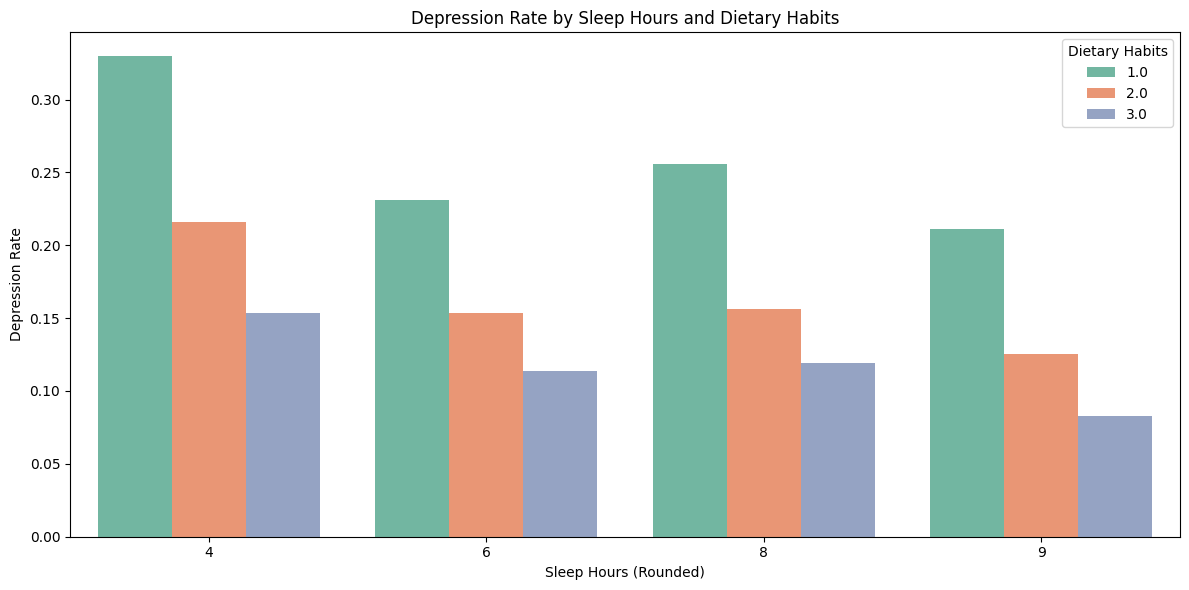

In [143]:
plt.figure(figsize=(12,6))
sns.barplot(data=grouped,
            x='Sleep_Hour_Int',
            y='Depression_Rate',
            hue='Dietary_Category',
            palette='Set2')

plt.title('Depression Rate by Sleep Hours and Dietary Habits')
plt.xlabel('Sleep Hours (Rounded)')
plt.ylabel('Depression Rate')
plt.legend(title='Dietary Habits')
plt.tight_layout()
plt.show()

In [144]:
df_int = train[['Sleep Hours', 'Dietary_Category', 'Depression']].dropna()
import statsmodels.formula.api as smf

# 교호작용 포함 로지스틱 회귀
model = smf.logit(formula='Depression ~ Q("Sleep Hours") * Dietary_Category', data=df_int).fit()

# 결과 출력
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.459807
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Depression   No. Observations:               140700
Model:                          Logit   Df Residuals:                   140696
Method:                           MLE   Df Model:                            3
Date:                Tue, 03 Jun 2025   Pseudo R-squ.:                 0.02990
Time:                        08:01:07   Log-Likelihood:                -64695.
converged:                       True   LL-Null:                       -66689.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             0.0592      0.068      0

| 변수                                  | 계수 (coef) | p-value   | 해석                                           |
| ----------------------------------- | --------- | --------- | -------------------------------------------- |
| **Intercept**                       | +0.0592   | 0.381     | 비유의미 (기준선 위험 없음)                             |
| **Q("Sleep Hours")**                | -0.0971   | <0.001    | **수면시간이 1시간 늘어날수록 우울증 위험 감소** *(오즈비 ≈ 0.91)* |
| **Dietary\_Category**               | -0.4277   | <0.001    | **식습관이 더 건강할수록 우울증 위험 낮음** *(오즈비 ≈ 0.65)*    |
| **Sleep Hours × Dietary\_Category** | -0.0107   | **0.042** | 교호작용 **유의미** — 아래 참고                         |


        



| 수면시간 | 식습관       | 우울증 영향                  |
| ---- | --------- | ----------------------- |
| ↓ 낮음 | Unhealthy | 우울증 ↑↑ (위험 최대)          |
| ↓ 낮음 | Healthy   | 우울증 ↑ (보호작용 일부 존재)      |
| ↑ 높음 | Unhealthy | 우울증 ↓ (하지만 제한적 효과)      |
| ↑ 높음 | Healthy   | 우울증 **↓↓ (보호작용 극대화)** ✅ |


## 스트레스와 충동

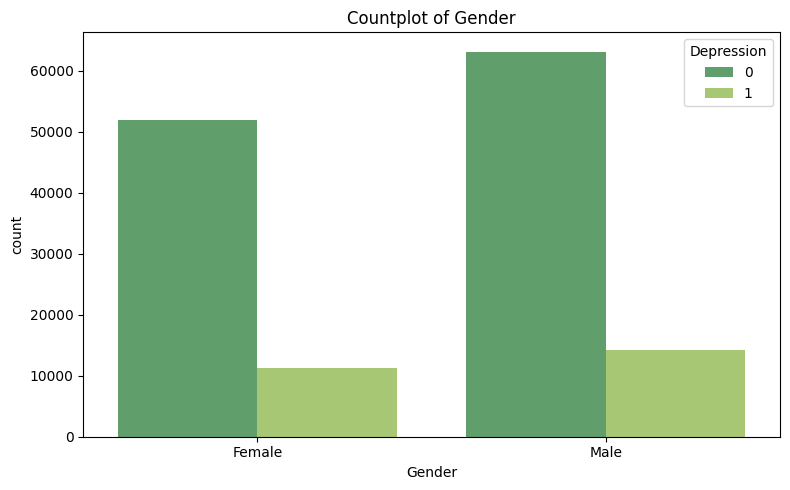

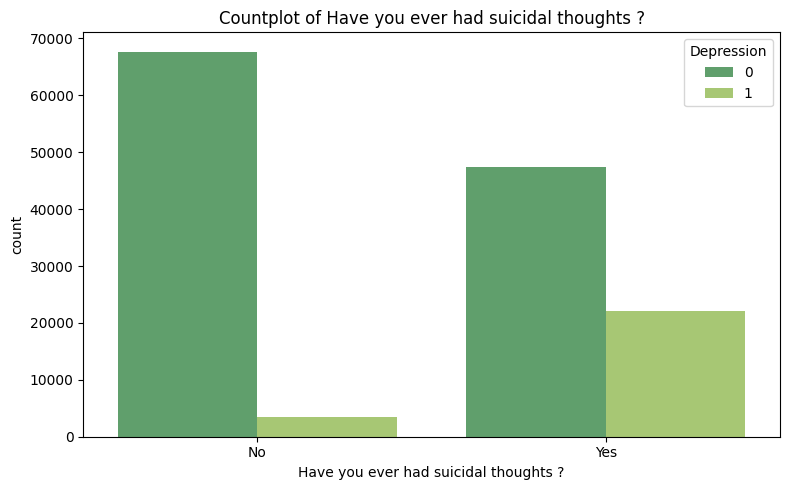

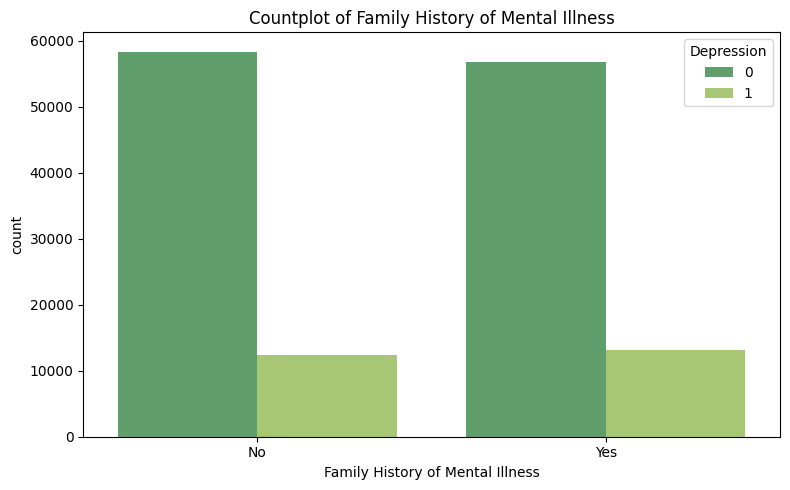

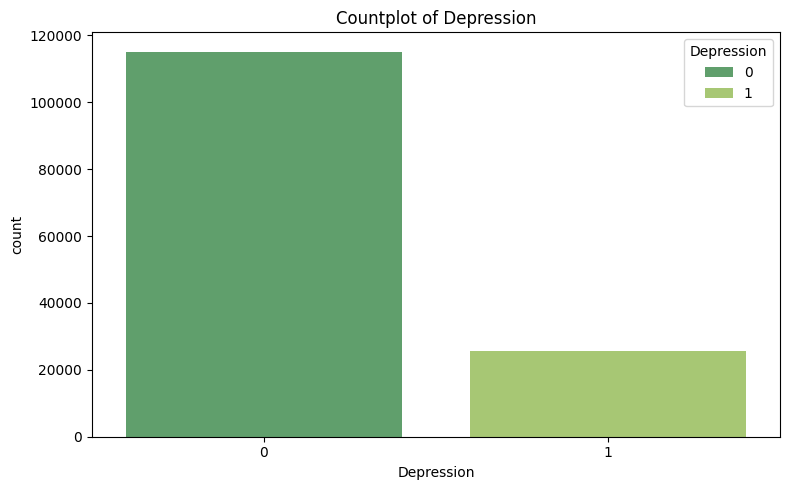

In [145]:
# Countplots for categorical columns with counts and percentages
categorical_columns_to_plot = ['Gender', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness', 'Depression']

total = len(train)
for column in categorical_columns_to_plot:
    plt.figure(figsize=(8, 5))
    ax = sns.countplot(data=train, x=column, palette='summer', hue = 'Depression')
    plt.title(f'Countplot of {column}')

 # Add count and percentage labels centered lower inside each bar
    for p in ax.patches:
        count = int(p.get_height())
        percent = 100 * count / total

    plt.tight_layout()
    plt.show()

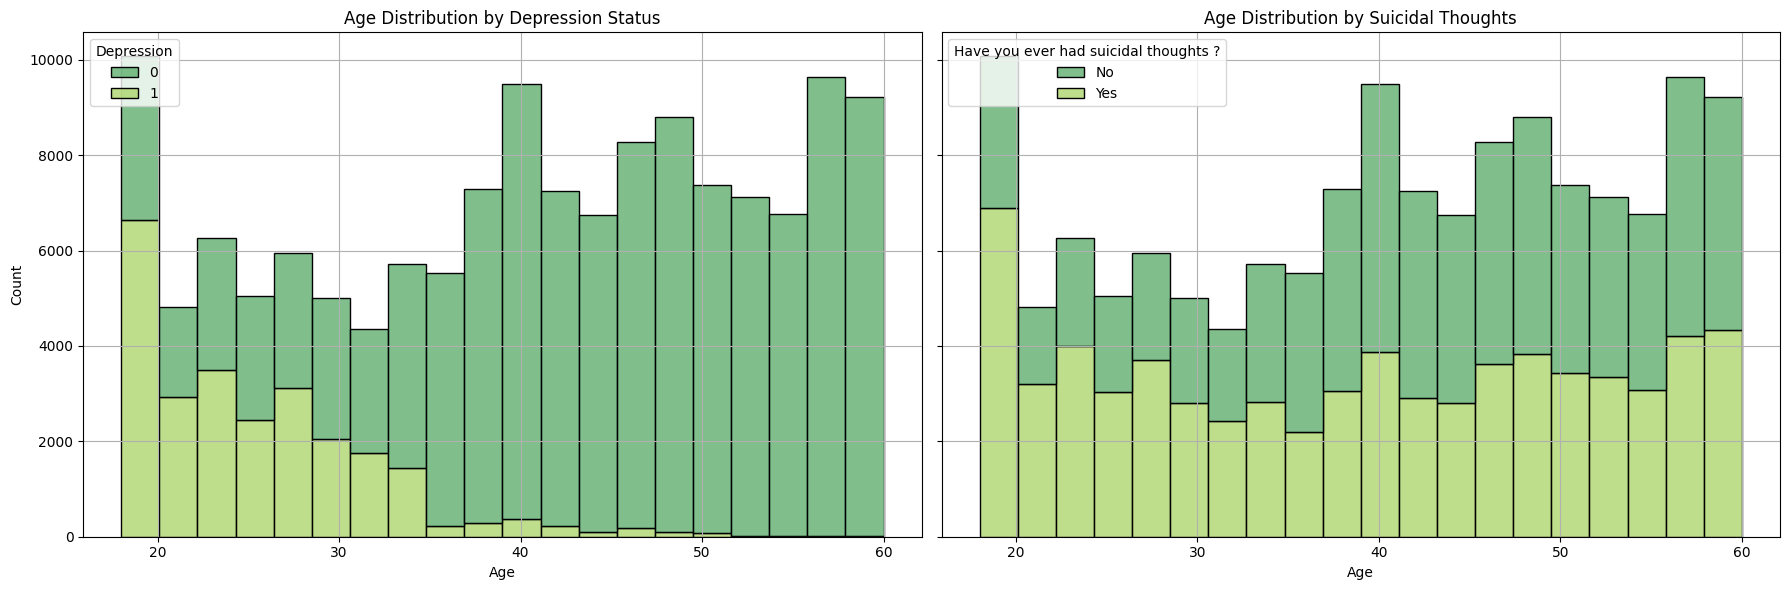

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# 첫 번째 그래프: Depression 여부에 따른 연령 분포
sns.histplot(data=train, x='Age', hue='Depression', multiple='stack',
             bins=20, edgecolor='black', palette='summer', ax=axes[0])
axes[0].set_title('Age Distribution by Depression Status')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')
axes[0].grid(True)

# 두 번째 그래프: 자살 생각 여부에 따른 연령 분포
sns.histplot(data=train, x='Age', hue='Have you ever had suicidal thoughts ?',
             multiple='stack', bins=20, edgecolor='black', palette='summer', ax=axes[1])
axes[1].set_title('Age Distribution by Suicidal Thoughts')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('')  # sharey=True 이므로 생략 가능
axes[1].grid(True)

# 레이아웃 조정
plt.tight_layout()
plt.show()


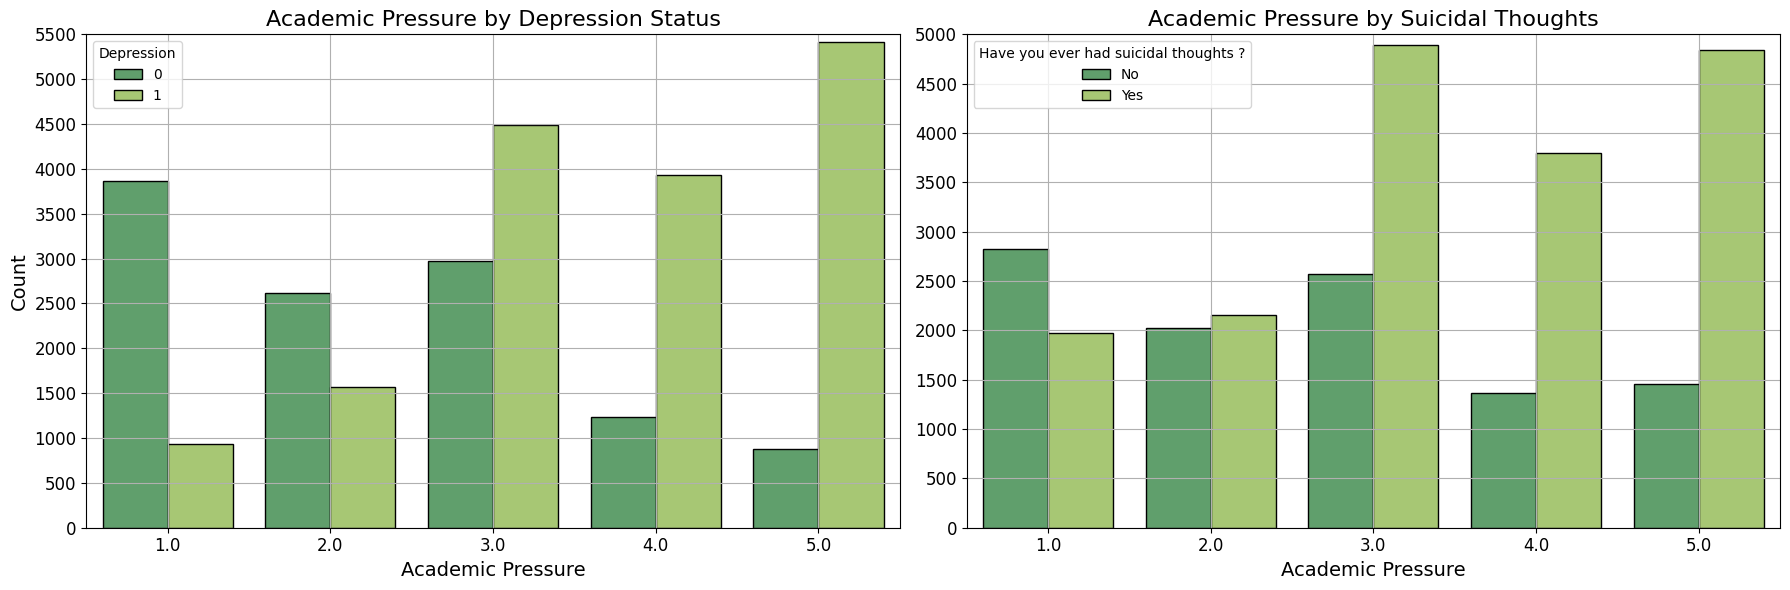

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up the plots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# 공통 설정
title_fontsize = 16
label_fontsize = 14
tick_fontsize = 12
ytick_step = 500  # ✅ y축 단위

# 첫 번째 그래프: 우울 여부
sns.countplot(data=train, x='Academic Pressure', hue='Depression',
              edgecolor='black', palette='summer', ax=axes[0])
axes[0].set_title('Academic Pressure by Depression Status', fontsize=title_fontsize)
axes[0].set_xlabel('Academic Pressure', fontsize=label_fontsize)
axes[0].set_ylabel('Count', fontsize=label_fontsize)
axes[0].tick_params(axis='x', labelsize=tick_fontsize)
axes[0].grid(True)

# 첫 번째 y축 범위 설정 (500 단위)
ymax0 = max([patch.get_height() for patch in axes[0].patches])
ymax0 = int(np.ceil(ymax0 / ytick_step)) * ytick_step
axes[0].set_ylim(0, ymax0)
axes[0].set_yticks(np.arange(0, ymax0 + 1, ytick_step))
axes[0].tick_params(axis='y', labelsize=tick_fontsize)

# 두 번째 그래프: 자살 생각 여부
sns.countplot(data=train, x='Academic Pressure', hue='Have you ever had suicidal thoughts ?',
              edgecolor='black', palette='summer', ax=axes[1])
axes[1].set_title('Academic Pressure by Suicidal Thoughts', fontsize=title_fontsize)
axes[1].set_xlabel('Academic Pressure', fontsize=label_fontsize)
axes[1].set_ylabel('', fontsize=label_fontsize)
axes[1].tick_params(axis='x', labelsize=tick_fontsize)
axes[1].grid(True)

# 두 번째 y축 범위 설정 (500 단위)
ymax1 = max([patch.get_height() for patch in axes[1].patches])
ymax1 = int(np.ceil(ymax1 / ytick_step)) * ytick_step
axes[1].set_ylim(0, ymax1)
axes[1].set_yticks(np.arange(0, ymax1 + 1, ytick_step))
axes[1].tick_params(axis='y', labelsize=tick_fontsize)

# 레이아웃 정리
plt.tight_layout()
plt.show()

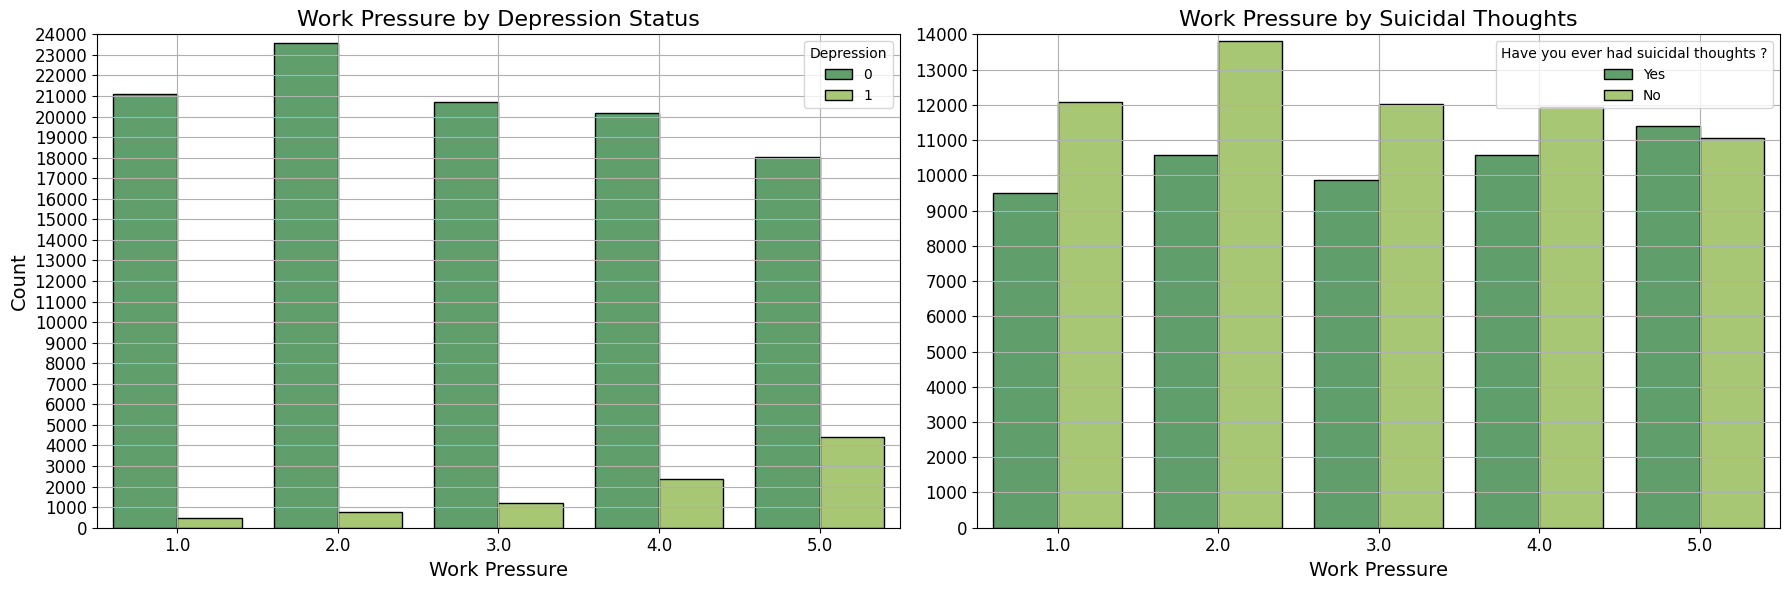

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up the plots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# 공통 설정
title_fontsize = 16
label_fontsize = 14
tick_fontsize = 12
ytick_step = 1000  # ✅ y축 단위

# 첫 번째 그래프: 우울 여부
sns.countplot(data=train, x='Work Pressure', hue='Depression',
              edgecolor='black', palette='summer', ax=axes[0])
axes[0].set_title('Work Pressure by Depression Status', fontsize=title_fontsize)
axes[0].set_xlabel('Work Pressure', fontsize=label_fontsize)
axes[0].set_ylabel('Count', fontsize=label_fontsize)
axes[0].tick_params(axis='x', labelsize=tick_fontsize)
axes[0].grid(True)

# 첫 번째 y축 범위 설정 (500 단위)
ymax0 = max([patch.get_height() for patch in axes[0].patches])
ymax0 = int(np.ceil(ymax0 / ytick_step)) * ytick_step
axes[0].set_ylim(0, ymax0)
axes[0].set_yticks(np.arange(0, ymax0 + 1, ytick_step))
axes[0].tick_params(axis='y', labelsize=tick_fontsize)

# 두 번째 그래프: 자살 생각 여부
sns.countplot(data=train, x='Work Pressure', hue='Have you ever had suicidal thoughts ?',
              edgecolor='black', palette='summer', ax=axes[1])
axes[1].set_title('Work Pressure by Suicidal Thoughts', fontsize=title_fontsize)
axes[1].set_xlabel('Work Pressure', fontsize=label_fontsize)
axes[1].set_ylabel('', fontsize=label_fontsize)
axes[1].tick_params(axis='x', labelsize=tick_fontsize)
axes[1].grid(True)

# 두 번째 y축 범위 설정 (500 단위)
ymax1 = max([patch.get_height() for patch in axes[1].patches])
ymax1 = int(np.ceil(ymax1 / ytick_step)) * ytick_step
axes[1].set_ylim(0, ymax1)
axes[1].set_yticks(np.arange(0, ymax1 + 1, ytick_step))
axes[1].tick_params(axis='y', labelsize=tick_fontsize)

# 레이아웃 정리
plt.tight_layout()
plt.show()

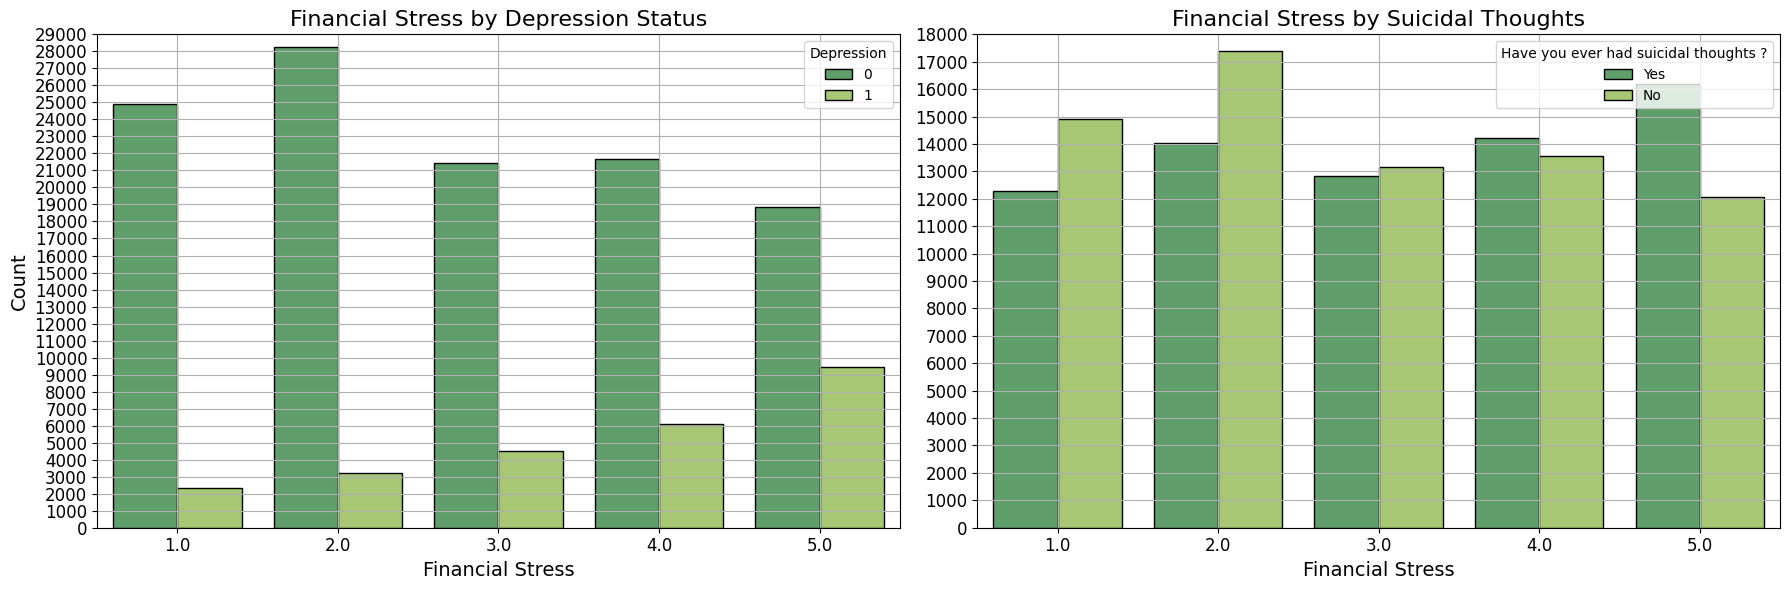

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 그래프 설정
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# 공통 설정값
title_fontsize = 16
label_fontsize = 14
tick_fontsize = 12
ytick_step = 1000  # ✅ y축 눈금 단위

# 첫 번째 그래프: Financial Stress vs Depression
sns.countplot(data=train, x='Financial Stress', hue='Depression',
              edgecolor='black', palette='summer', ax=axes[0])
axes[0].set_title('Financial Stress by Depression Status', fontsize=title_fontsize)
axes[0].set_xlabel('Financial Stress', fontsize=label_fontsize)
axes[0].set_ylabel('Count', fontsize=label_fontsize)
axes[0].tick_params(axis='x', labelsize=tick_fontsize)
axes[0].grid(True)

# 첫 번째 y축 설정
ymax0 = max([patch.get_height() for patch in axes[0].patches])
ymax0 = int(np.ceil(ymax0 / ytick_step)) * ytick_step
axes[0].set_ylim(0, ymax0)
axes[0].set_yticks(np.arange(0, ymax0 + 1, ytick_step))
axes[0].tick_params(axis='y', labelsize=tick_fontsize)

# 두 번째 그래프: Financial Stress vs Suicidal Thoughts
sns.countplot(data=train, x='Financial Stress', hue='Have you ever had suicidal thoughts ?',
              edgecolor='black', palette='summer', ax=axes[1])
axes[1].set_title('Financial Stress by Suicidal Thoughts', fontsize=title_fontsize)
axes[1].set_xlabel('Financial Stress', fontsize=label_fontsize)
axes[1].set_ylabel('', fontsize=label_fontsize)
axes[1].tick_params(axis='x', labelsize=tick_fontsize)
axes[1].grid(True)

# 두 번째 y축 설정
ymax1 = max([patch.get_height() for patch in axes[1].patches])
ymax1 = int(np.ceil(ymax1 / ytick_step)) * ytick_step
axes[1].set_ylim(0, ymax1)
axes[1].set_yticks(np.arange(0, ymax1 + 1, ytick_step))
axes[1].tick_params(axis='y', labelsize=tick_fontsize)

# 레이아웃 정리
plt.tight_layout()
plt.show()

## 도시와 학생

--- 학생 수가 100명 넘는 도시별 통계 ---
             City  Total_Count  Student_Count  Student_Ratio
17      Hyderabad         4496           1340       0.298043
10       Srinagar         5074           1372       0.270398
21        Lucknow         4280           1155       0.269860
27         Bhopal         3475            934       0.268777
20          Thane         4289           1139       0.265563
19         Jaipur         4328           1036       0.239372
0          Kalyan         6591           1570       0.238204
13           Agra         4684           1094       0.233561
14          Surat         4636           1078       0.232528
2     Vasai-Virar         5765           1290       0.223764
24        Chennai         4044            885       0.218843
26          Delhi         3593            768       0.213749
6        Ludhiana         5226           1111       0.212591
25      Ghaziabad         3620            745       0.205801
3         Kolkata         5689           1066       0.18

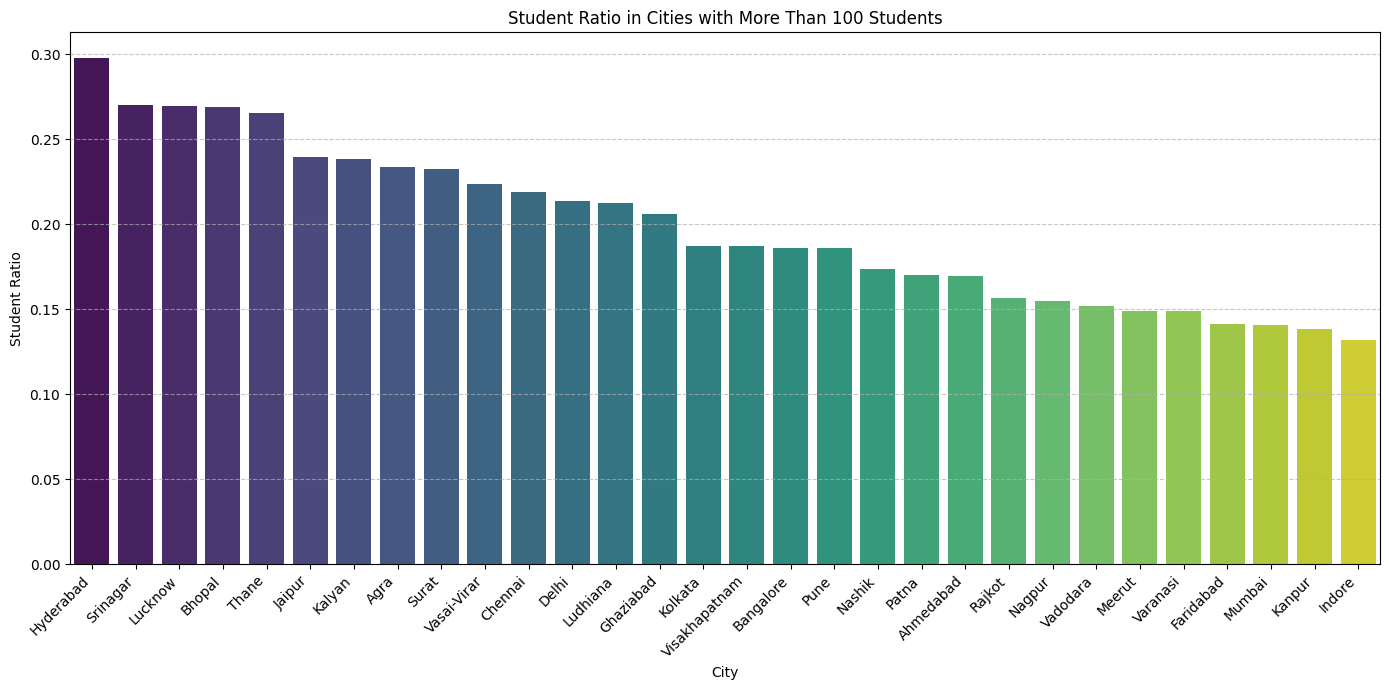

In [150]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# df_train 데이터프레임이 이미 로드되어 있고,
# 'City' 컬럼과 'Working Professional or Student' 컬럼이 포함되어 있다고 가정합니다.

# 1. 도시별 전체 개체 수 계산
city_total_counts = train['City'].value_counts().reset_index()
city_total_counts.columns = ['City', 'Total_Count']

# 2. 도시별 학생 수 계산
# 'Working Professional or Student'가 'Student'인 경우만 필터링하여 도시별 카운트 계산
student_counts = train[train['Working Professional or Student'] == 'Student']['City'].value_counts().reset_index()
student_counts.columns = ['City', 'Student_Count']

# 3. 전체 카운트와 학생 수 카운트 데이터프레임을 도시를 기준으로 병합
city_stats = pd.merge(city_total_counts, student_counts, on='City', how='left')

# 학생 수가 없는 도시는 병합 후 Student_Count가 NaN이 되므로 0으로 채워줍니다.
city_stats['Student_Count'] = city_stats['Student_Count'].fillna(0).astype(int)

# 4. 학생 비율 계산
city_stats['Student_Ratio'] = city_stats['Student_Count'] / city_stats['Total_Count']

# 5. 학생 수가 100명을 넘는 도시만 필터링
filtered_city_stats = city_stats[city_stats['Student_Count'] > 100].sort_values(by='Student_Ratio', ascending=False)


print("--- 학생 수가 100명 넘는 도시별 통계 ---")
print(filtered_city_stats)
print("-" * 30)


# 6. 필터링된 도시의 학생 비율 시각화 (막대 그래프)
if not filtered_city_stats.empty:
    plt.figure(figsize=(14, 7)) # 그래프 크기 설정 (필터링된 도시 수에 따라 조절)
    # 막대 그래프 생성
    sns.barplot(data=filtered_city_stats, x='City', y='Student_Ratio', palette='viridis')

    plt.title('Student Ratio in Cities with More Than 100 Students') # 그래프 제목 설정
    plt.xlabel('City') # x축 레이블 설정
    plt.ylabel('Student Ratio') # y축 레이블 설정
    plt.xticks(rotation=45, ha='right') # 도시 이름이 겹치지 않도록 회전
    plt.grid(axis='y', linestyle='--', alpha=0.7) # y축 그리드 추가
    plt.tight_layout() # 그래프 여백 자동 조절
    plt.show()
else:
    print("학생 수가 100명을 넘는 도시가 없습니다.")

--- 학생 수가 100명 넘는 도시별 학생 비율 및 우울증 비율 ---
             City  Student_Ratio  Student_Count  Depression_Ratio
0          Kalyan       0.238204           1570          0.199666
1           Patna       0.169986           1007          0.163234
2     Vasai-Virar       0.223764           1290          0.197918
3         Kolkata       0.187379           1066          0.173668
4       Ahmedabad       0.169428            951          0.217887
5          Meerut       0.149240            825          0.134045
6        Ludhiana       0.212591           1111          0.192690
7            Pune       0.185797            968          0.161036
8          Rajkot       0.156712            816          0.173228
9   Visakhapatnam       0.187210            969          0.159196
10       Srinagar       0.270398           1372          0.211667
11         Mumbai       0.140757            699          0.131293
12         Indore       0.131979            643          0.160920
13           Agra       0.233561   

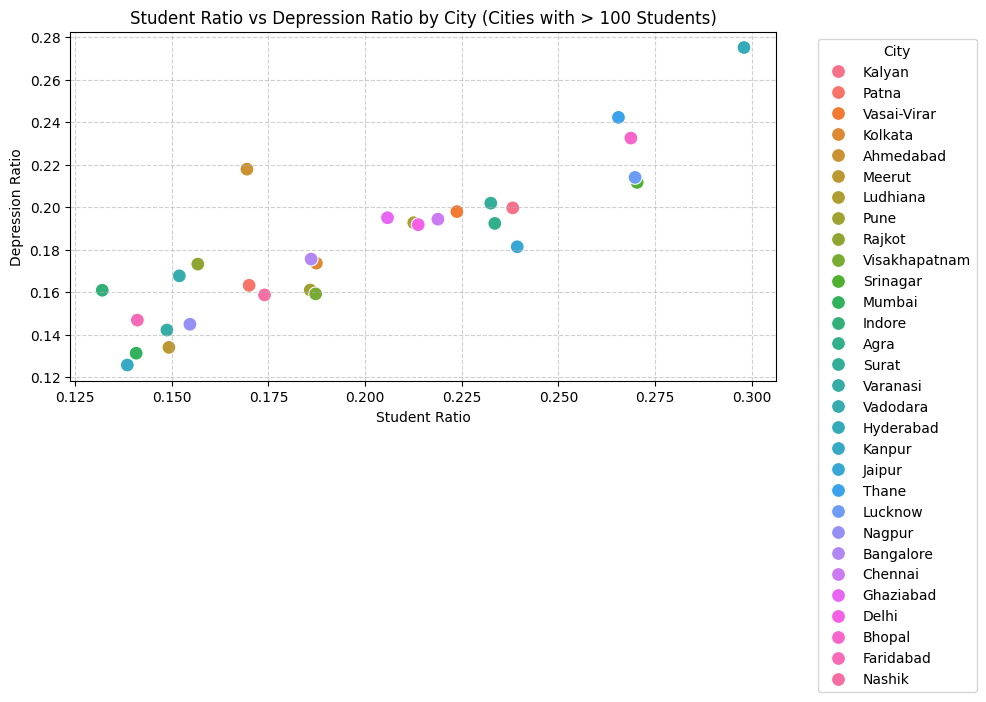

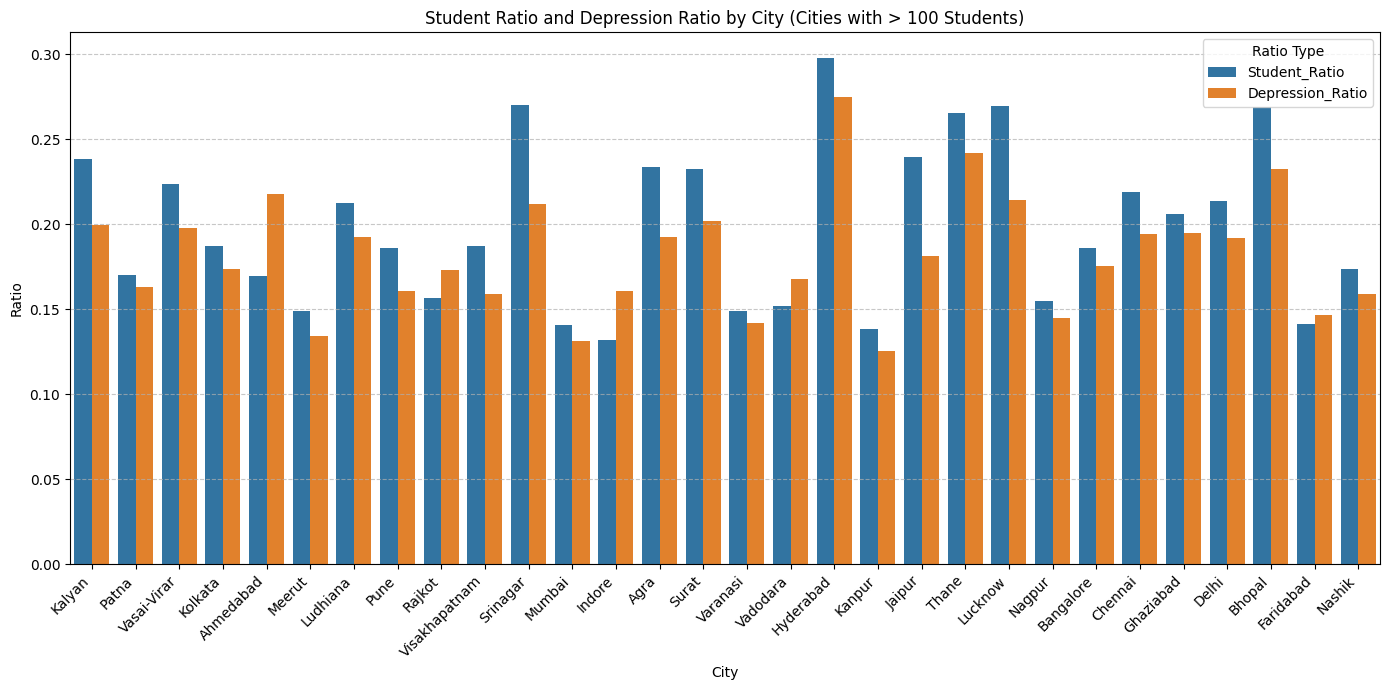

In [151]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# df_train 데이터프레임이 이미 로드되어 있고,
# 'City' 컬럼과 'Depression' 컬럼이 포함되어 있다고 가정합니다.

# 1. 도시별 전체 개체 수 계산 (앞서 계산한 city_total_counts 재사용)
city_total_counts = train['City'].value_counts().reset_index()
city_total_counts.columns = ['City', 'Total_Count']

# 2. 도시별 우울증 있는 개체 수 계산
# 'Depression'이 1인 경우만 필터링하여 도시별 카운트 계산
depressed_counts = train[train['Depression'] == 1]['City'].value_counts().reset_index()
depressed_counts.columns = ['City', 'Depressed_Count']

# 3. 도시별 전체 통계와 우울증 통계 병합
city_depression_stats = pd.merge(city_total_counts, depressed_counts, on='City', how='left')

# 우울증 있는 개체가 없는 도시는 병합 후 Depressed_Count가 NaN이 되므로 0으로 채워줍니다.
city_depression_stats['Depressed_Count'] = city_depression_stats['Depressed_Count'].fillna(0).astype(int)

# 4. 도시별 우울증 비율 계산
city_depression_stats['Depression_Ratio'] = city_depression_stats['Depressed_Count'] / city_depression_stats['Total_Count']

# 5. 기존에 계산한 도시별 학생 비율 데이터와 병합
# 앞서 "학생 수가 100명 넘는 도시별 학생 비율 시각화" 코드에서 계산한 city_stats DataFrame이 있다고 가정합니다.
# 만약 city_stats DataFrame이 없다면, 해당 코드를 먼저 실행하여 city_stats를 생성해야 합니다.
# 여기서는 city_stats DataFrame에 이미 'City', 'Total_Count', 'Student_Count', 'Student_Ratio' 컬럼이 있다고 가정합니다.

# 필요한 컬럼만 선택하여 병합
# city_stats는 전체 도시 정보를 포함하고 있으므로, 전체 도시를 기준으로 병합합니다.
# 학생 비율이 100명 넘는 도시 필터링은 시각화 단계에서 수행합니다.
city_combined_stats = pd.merge(city_stats[['City', 'Student_Ratio', 'Student_Count']],
                               city_depression_stats[['City', 'Depression_Ratio']],
                               on='City',
                               how='inner') # 두 데이터 모두에 있는 도시만 선택

# 학생 수가 100명을 넘는 도시만 필터링
filtered_city_combined_stats = city_combined_stats[city_combined_stats['Student_Count'] > 100].copy()

print("--- 학생 수가 100명 넘는 도시별 학생 비율 및 우울증 비율 ---")
print(filtered_city_combined_stats)
print("-" * 30)


# 6. 시각화

# 시각화 방법 1: 산점도 (Scatter Plot)
if not filtered_city_combined_stats.empty:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=filtered_city_combined_stats,
                    x='Student_Ratio',
                    y='Depression_Ratio',
                    hue='City', # 도시별로 색상 구분 (도시가 많으면 비효율적일 수 있음)
                    s=100) # 점 크기 설정

    # 도시 이름 표시 (선택 사항, 도시가 많으면 겹칠 수 있음)
    # for i in range(len(filtered_city_combined_stats)):
    #     plt.text(filtered_city_combined_stats['Student_Ratio'].iloc[i] + 0.01,
    #              filtered_city_combined_stats['Depression_Ratio'].iloc[i],
    #              filtered_city_combined_stats['City'].iloc[i],
    #              fontsize=9)

    plt.title('Student Ratio vs Depression Ratio by City (Cities with > 100 Students)')
    plt.xlabel('Student Ratio')
    plt.ylabel('Depression Ratio')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left') # 범례 위치 조정
    plt.tight_layout()
    plt.show()
else:
     print("학생 수가 100명을 넘는 도시가 없습니다.")


# 시각화 방법 2: 결합된 막대 그래프 (Dual Axis Bar Plot 또는 Grouped Bar Plot)
# 두 변수의 스케일이 0-1로 동일하므로 Grouped Bar Plot이 적합합니다.

if not filtered_city_combined_stats.empty:
    # 데이터를 melt하여 seaborn의 barplot으로 그룹화하기 쉽게 만듭니다.
    df_melted = filtered_city_combined_stats.melt(id_vars=['City'],
                                                  value_vars=['Student_Ratio', 'Depression_Ratio'],
                                                  var_name='Ratio_Type',
                                                  value_name='Ratio_Value')

    plt.figure(figsize=(14, 7))
    sns.barplot(data=df_melted,
                x='City',
                y='Ratio_Value',
                hue='Ratio_Type', # 학생 비율 vs 우울증 비율로 그룹화
                palette='tab10') # 다른 색상 팔레트 사용 예시

    plt.title('Student Ratio and Depression Ratio by City (Cities with > 100 Students)')
    plt.xlabel('City')
    plt.ylabel('Ratio')
    plt.xticks(rotation=45, ha='right') # 도시 이름이 겹치지 않도록 회전
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title='Ratio Type')
    plt.tight_layout()
    plt.show()
else:
    print("학생 수가 100명을 넘는 도시가 없습니다.")

In [152]:
df_students = train[train['Working Professional or Student'] == 'Student'].copy()
df_students

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,...,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Sleep Hours,Dietary_Category,GreenSpace,PopulationDensity
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,...,B.Pharm,Yes,3.0,1.0,No,1,5.5,3.0,0.18,3900.0
8,8,Aishwarya,Female,24.0,Bangalore,Student,NaN,2.0,NaN,5.90,...,BSc,No,3.0,2.0,Yes,0,5.5,2.0,3.31,4381.0
26,26,Aditya,Male,31.0,Srinagar,Student,NaN,3.0,NaN,7.03,...,BA,No,9.0,1.0,Yes,0,4.5,3.0,2.60,5283.0
30,30,Prisha,Female,28.0,Varanasi,Student,NaN,3.0,NaN,5.59,...,BCA,Yes,4.0,5.0,Yes,1,7.5,2.0,24.78,2367.0
32,32,Chhavi,Female,25.0,Jaipur,Student,NaN,4.0,NaN,8.13,...,M.Tech,Yes,1.0,1.0,No,0,5.5,2.0,6.67,6491.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140685,140685,Aaradhya,Female,27.0,Surat,Student,NaN,5.0,NaN,5.75,...,Class 12,Yes,7.0,1.0,Yes,0,5.5,1.0,5.90,13600.0
140686,140686,Rohan,Male,27.0,Ludhiana,Student,NaN,2.0,NaN,9.40,...,MSc,No,0.0,3.0,Yes,0,4.5,3.0,0.80,9781.0
140689,140689,Ayaan,Male,31.0,Faridabad,Student,NaN,3.0,NaN,6.61,...,MD,No,12.0,2.0,No,0,5.5,1.0,3.00,9233.0
140690,140690,Rashi,Female,18.0,Ludhiana,Student,NaN,5.0,NaN,6.88,...,Class 12,Yes,10.0,5.0,No,1,4.5,3.0,0.80,9781.0


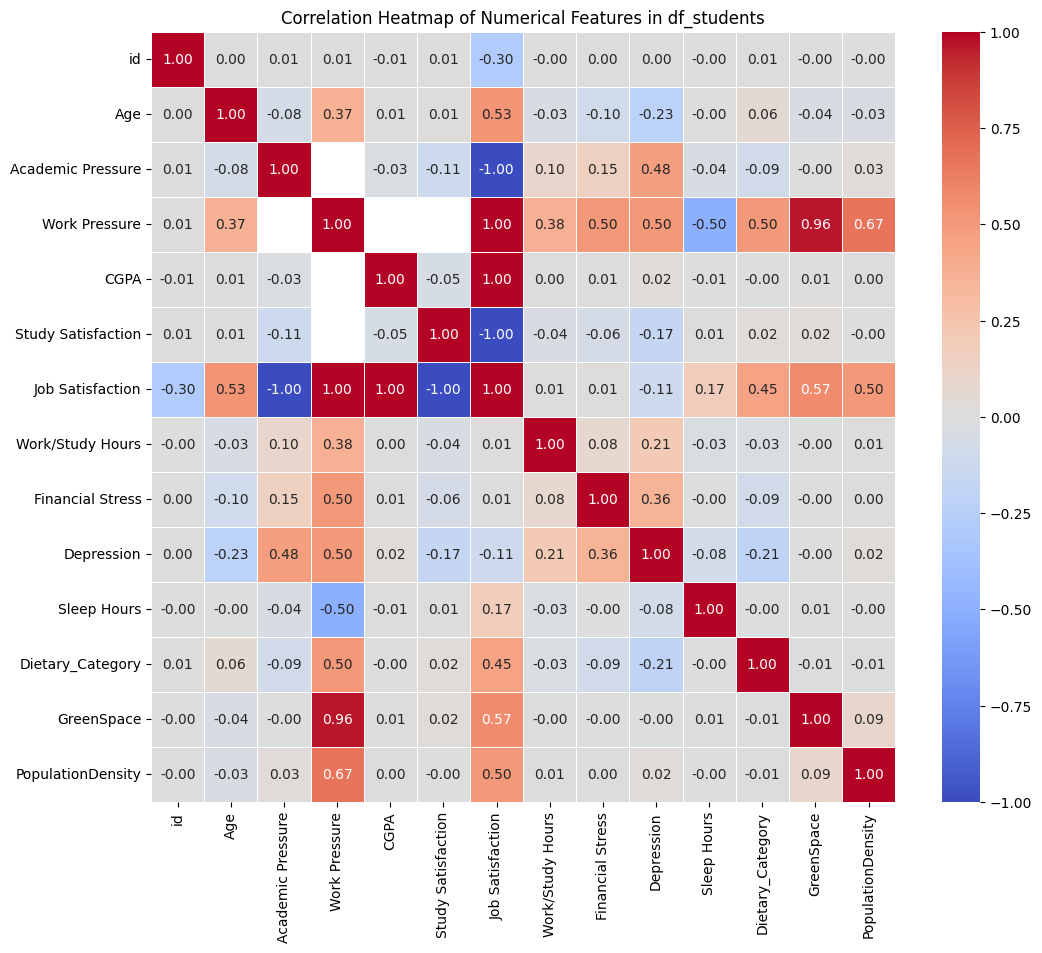

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt

# df_students DataFrame의 수치형 피쳐 간의 상관 행렬 계산
# .corr() 메소드는 DataFrame의 모든 수치형 컬럼 간의 pairwise 상관관계를 계산합니다.
correlation_matrix = df_students.corr(numeric_only=True)

# 상관 행렬을 히트맵으로 시각화
plt.figure(figsize=(12, 10)) # 히트맵 크기 설정 (원하는 크기로 조절 가능)
sns.heatmap(correlation_matrix,
            annot=True, # 각 셀에 상관계수 값 표시
            cmap='coolwarm', # 색상 팔레트 설정 ('coolwarm', 'viridis', 'plasma' 등 사용 가능)
            fmt=".2f", # 소수점 둘째 자리까지 표시
            linewidths=.5) # 셀 경계선 두께 설정

plt.title('Correlation Heatmap of Numerical Features in df_students') # 그래프 제목 설정
plt.show() # 그래프 표시

In [154]:
city_student_counts = df_students['City'].value_counts()

# 학생 수가 400명 이하인 도시 리스트 파악
cities_to_remove = city_student_counts[city_student_counts <= 400].index.tolist()

# 이상치 도시(학생 수 400명 이하인 도시)에 포함되지 않는 데이터만 남기고 제거
df_students = df_students[~df_students['City'].isin(cities_to_remove)].copy()

print(f"제거된 도시: {cities_to_remove}")
print("학생 수 400명이 넘는 도시의 데이터만 남은 df_students:")
print(df_students.head())
print(f"이상치 제거 후 df_students의 행 개수: {len(df_students)}")

제거된 도시: ['Saanvi', 'Bhavna', 'City', 'Harsha', 'Less Delhi', 'M.Tech', '3.0', 'Less than 5 Kalyan', 'Mira', 'Vaanya', 'Gaurav', 'Harsh', 'Reyansh', 'Kibara', 'Rashi', 'ME', 'M.Com', 'Nalyan', 'Mihir', 'Nalini', 'Nandini', 'Khaziabad']
학생 수 400명이 넘는 도시의 데이터만 남은 df_students:
    id       Name  Gender   Age           City  \
2    2     Yuvraj    Male  33.0  Visakhapatnam   
8    8  Aishwarya  Female  24.0      Bangalore   
26  26     Aditya    Male  31.0       Srinagar   
30  30     Prisha  Female  28.0       Varanasi   
32  32     Chhavi  Female  25.0         Jaipur   

   Working Professional or Student Profession  Academic Pressure  \
2                          Student        NaN                5.0   
8                          Student        NaN                2.0   
26                         Student        NaN                3.0   
30                         Student        NaN                3.0   
32                         Student        NaN                4.0   

    Work Pressur

In [155]:
df_students

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,...,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Sleep Hours,Dietary_Category,GreenSpace,PopulationDensity
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,...,B.Pharm,Yes,3.0,1.0,No,1,5.5,3.0,0.18,3900.0
8,8,Aishwarya,Female,24.0,Bangalore,Student,NaN,2.0,NaN,5.90,...,BSc,No,3.0,2.0,Yes,0,5.5,2.0,3.31,4381.0
26,26,Aditya,Male,31.0,Srinagar,Student,NaN,3.0,NaN,7.03,...,BA,No,9.0,1.0,Yes,0,4.5,3.0,2.60,5283.0
30,30,Prisha,Female,28.0,Varanasi,Student,NaN,3.0,NaN,5.59,...,BCA,Yes,4.0,5.0,Yes,1,7.5,2.0,24.78,2367.0
32,32,Chhavi,Female,25.0,Jaipur,Student,NaN,4.0,NaN,8.13,...,M.Tech,Yes,1.0,1.0,No,0,5.5,2.0,6.67,6491.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140685,140685,Aaradhya,Female,27.0,Surat,Student,NaN,5.0,NaN,5.75,...,Class 12,Yes,7.0,1.0,Yes,0,5.5,1.0,5.90,13600.0
140686,140686,Rohan,Male,27.0,Ludhiana,Student,NaN,2.0,NaN,9.40,...,MSc,No,0.0,3.0,Yes,0,4.5,3.0,0.80,9781.0
140689,140689,Ayaan,Male,31.0,Faridabad,Student,NaN,3.0,NaN,6.61,...,MD,No,12.0,2.0,No,0,5.5,1.0,3.00,9233.0
140690,140690,Rashi,Female,18.0,Ludhiana,Student,NaN,5.0,NaN,6.88,...,Class 12,Yes,10.0,5.0,No,1,4.5,3.0,0.80,9781.0


In [156]:

# prompt: id, Name, Gender, Working Professional or Student, Working Professional or Student 컬럼을 제거해줘.

# df_students = df_students.drop(['id', 'Name', 'Gender', 'Working Professional or Student','CGPA','Family History of Mental Illness'], axis=1)

df_students

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,...,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Sleep Hours,Dietary_Category,GreenSpace,PopulationDensity
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,...,B.Pharm,Yes,3.0,1.0,No,1,5.5,3.0,0.18,3900.0
8,8,Aishwarya,Female,24.0,Bangalore,Student,NaN,2.0,NaN,5.90,...,BSc,No,3.0,2.0,Yes,0,5.5,2.0,3.31,4381.0
26,26,Aditya,Male,31.0,Srinagar,Student,NaN,3.0,NaN,7.03,...,BA,No,9.0,1.0,Yes,0,4.5,3.0,2.60,5283.0
30,30,Prisha,Female,28.0,Varanasi,Student,NaN,3.0,NaN,5.59,...,BCA,Yes,4.0,5.0,Yes,1,7.5,2.0,24.78,2367.0
32,32,Chhavi,Female,25.0,Jaipur,Student,NaN,4.0,NaN,8.13,...,M.Tech,Yes,1.0,1.0,No,0,5.5,2.0,6.67,6491.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140685,140685,Aaradhya,Female,27.0,Surat,Student,NaN,5.0,NaN,5.75,...,Class 12,Yes,7.0,1.0,Yes,0,5.5,1.0,5.90,13600.0
140686,140686,Rohan,Male,27.0,Ludhiana,Student,NaN,2.0,NaN,9.40,...,MSc,No,0.0,3.0,Yes,0,4.5,3.0,0.80,9781.0
140689,140689,Ayaan,Male,31.0,Faridabad,Student,NaN,3.0,NaN,6.61,...,MD,No,12.0,2.0,No,0,5.5,1.0,3.00,9233.0
140690,140690,Rashi,Female,18.0,Ludhiana,Student,NaN,5.0,NaN,6.88,...,Class 12,Yes,10.0,5.0,No,1,4.5,3.0,0.80,9781.0


In [157]:
initial_rows = len(df_students)
df_students = df_students[df_students['Work Pressure'].isna()].copy()

removed_rows = initial_rows - len(df_students)
print(f"'Work Pressure'가 NaN 값이 아닌 이상치 데이터 {removed_rows}개를 제거했습니다.")
print("Work Pressure가 NaN인 데이터만 남은 df_students:")
print(df_students.head())
print(f"이상치 제거 후 df_students의 행 개수: {len(df_students)}")

'Work Pressure'가 NaN 값이 아닌 이상치 데이터 3개를 제거했습니다.
Work Pressure가 NaN인 데이터만 남은 df_students:
    id       Name  Gender   Age           City  \
2    2     Yuvraj    Male  33.0  Visakhapatnam   
8    8  Aishwarya  Female  24.0      Bangalore   
26  26     Aditya    Male  31.0       Srinagar   
30  30     Prisha  Female  28.0       Varanasi   
32  32     Chhavi  Female  25.0         Jaipur   

   Working Professional or Student Profession  Academic Pressure  \
2                          Student        NaN                5.0   
8                          Student        NaN                2.0   
26                         Student        NaN                3.0   
30                         Student        NaN                3.0   
32                         Student        NaN                4.0   

    Work Pressure  CGPA  ...   Degree  Have you ever had suicidal thoughts ?  \
2             NaN  8.97  ...  B.Pharm                                    Yes   
8             NaN  5.90  ...      BSc     

In [158]:
df_students = df_students[df_students['Job Satisfaction'].isna()].copy()
df_students = df_students.drop(['Job Satisfaction'],axis =1 )

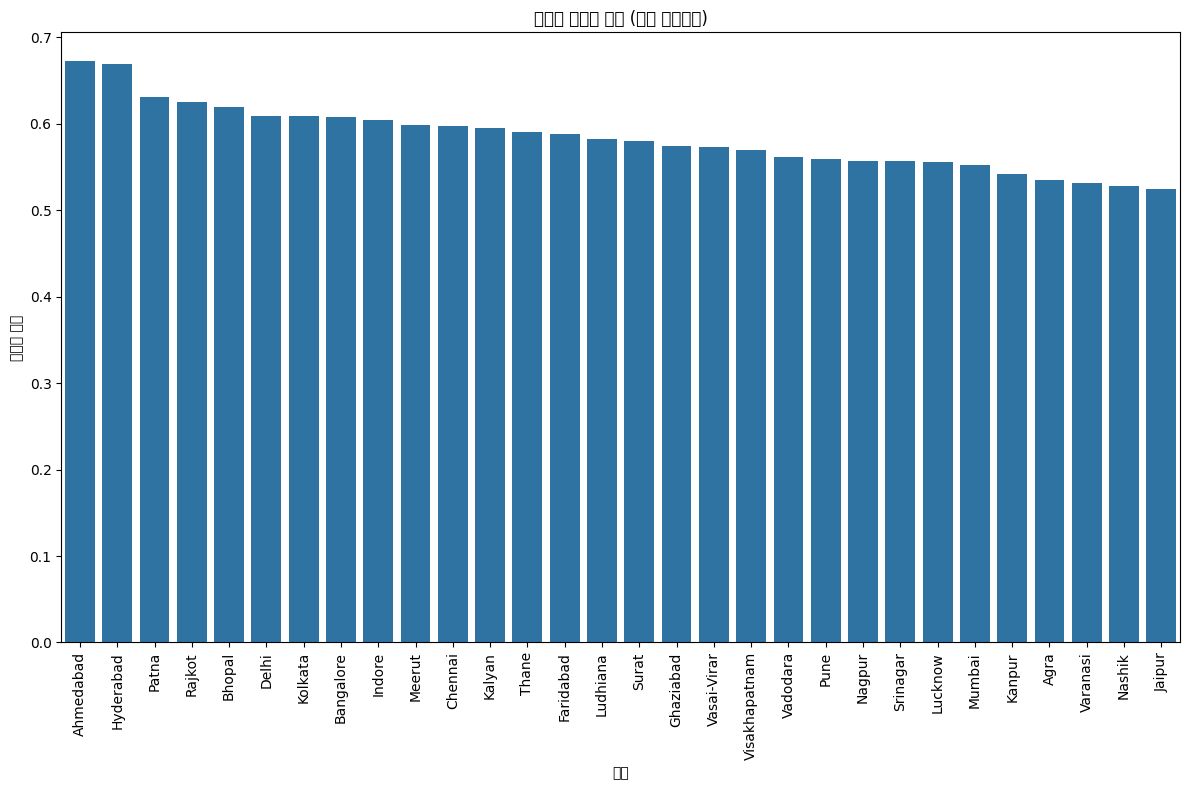

In [159]:
# prompt: 도시별로 depression 비율을 시각화하고 높은 순서대로 정렬해줘.

# 도시별 우울증 비율 계산
city_depression_rate = df_students.groupby('City')['Depression'].value_counts(normalize=True).unstack()[1].sort_values(ascending=False)

# 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x=city_depression_rate.index, y=city_depression_rate.values)
plt.title('도시별 우울증 비율 (높은 순서대로)')
plt.xlabel('도시')
plt.ylabel('우울증 비율')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 피처 엔지니어링

In [160]:
# Feature Engineering
# Create an interaction term between Age and Work Pressure
train['Age_WorkPressure'] = train['Age'] * train['Work Pressure']
test['Age_WorkPressure'] = test['Age'] * test['Work Pressure']

# Target encoding for categorical features
encoder = TargetEncoder(cols=['City', 'Profession'])
train[['City_encoded', 'Profession_encoded']] = encoder.fit_transform(train[['City', 'Profession']], train["Depression"])
test[['City_encoded', 'Profession_encoded']] = encoder.transform(test[['City', 'Profession']])

In [161]:
# Save 'id' column for submission
test_ids = test['id']

# Drop 'id' column in both datasets
train = train.drop(['id'], axis=1)
test = test.drop(['id'], axis=1)

# Define the target column
target_column = 'Depression'

# Select categorical and numerical columns (initial)
categorical_columns = train.select_dtypes(include=['object']).columns
numerical_columns = train.select_dtypes(exclude=['object']).columns.drop(target_column)

# Print out column information
print("Target Column:", target_column)
print("\nCategorical Columns:", categorical_columns.tolist())
print("\nNumerical Columns:", numerical_columns.tolist())

Target Column: Depression

Categorical Columns: ['Name', 'Gender', 'City', 'Working Professional or Student', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']

Numerical Columns: ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress', 'Sleep Hours', 'Dietary_Category', 'GreenSpace', 'PopulationDensity', 'Age_WorkPressure', 'City_encoded', 'Profession_encoded']


In [162]:

train = train.drop(['Name', 'Dietary Habits', 'Sleep Duration'], axis=1)


In [163]:
# Define features and target
X_train = train.drop('Depression', axis=1)
y_train = train['Depression']

# Redefine columns for preprocessing after feature engineering
numerical_columns = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_columns = X_train.select_dtypes(include=['object']).columns.tolist()

# Define preprocessing pipelines
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('convert_to_float32', FunctionTransformer(lambda x: x.astype(np.float32)))
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('ordinal', OrdinalEncoder(dtype=np.int32, handle_unknown='use_encoded_value', unknown_value=-1))
])

# Combine the numerical and categorical pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_columns),
        ('cat', categorical_pipeline, categorical_columns)
    ]
)

# Apply the transformations to the training and test sets
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(test)

# 모델링


In [164]:
# Apply Isolation Forest for outlier detection on the training data
isolation_forest = IsolationForest(contamination=0.04, random_state=rs)
outlier_labels = isolation_forest.fit_predict(X_train_preprocessed)

# Filter out outliers from both X_train_preprocessed and y_train
non_outliers_mask = outlier_labels != -1
X_train_preprocessed = X_train_preprocessed[non_outliers_mask]
y_train = y_train[non_outliers_mask]

In [165]:
xgb_params = {
     'learning_rate': 0.298913248058474,
     'max_depth': 9,
     'min_child_weight': 3,
     'n_estimators': 673,
     'subsample': 0.5933970249700855,
     'gamma': 2.597137534750985,
     'reg_lambda': 0.11328048420927406,
     'colsample_bytree': 0.1381203919800721
}

catboost_params = {
    'iterations': 145,
    'depth': 7,
    'learning_rate': 0.29930179265937246,
    'l2_leaf_reg': 1.242352421942431,
    'random_strength': 8.325681754379957,
    'bagging_temperature': 0.7869848919618048,
    'border_count': 139
}

hgb_params = {
    'learning_rate': 0.16299202834206894,
    'max_iter': 250,
    'max_depth': 4,
    'l2_regularization': 7.1826466833939895,
    'early_stopping': True
}

# Initialize models with pre-tuned and trial-specific parameters
xgb_model = XGBClassifier(**xgb_params, use_label_encoder=False, random_state=rs)
catboost_model = CatBoostClassifier(**catboost_params, task_type="GPU", random_state=rs, verbose=0)
hgb_model = HistGradientBoostingClassifier(**hgb_params, random_state=rs)

# Define stacking ensemble with the LightGBM model tuned in this trial
stacking_ensemble = StackingClassifier(
    estimators=[
        ('catboost', catboost_model),
        ('xgb', xgb_model),
        ('hgb', hgb_model)
    ],
    final_estimator=LogisticRegression(),
    passthrough=False
)

In [166]:
catboost_model_test = CatBoostClassifier(**catboost_params, task_type="GPU", random_state=rs, verbose=0)

In [167]:
model = CatBoostClassifier(verbose=0)
model.fit(X_train_preprocessed, y_train,)

In [168]:
feat_importance = model.get_feature_importance()
feat_names = X_train.columns

pd.Series(feat_importance, index=feat_names).sort_values(ascending=False)

,0
Gender,27.901866
City_encoded,13.816771
CGPA,6.479266
Academic Pressure,6.333136
City,6.043580
Work Pressure,5.430443
Work/Study Hours,5.325162
Family History of Mental Illness,3.987069
Job Satisfaction,2.731309
Age_WorkPressure,2.670766


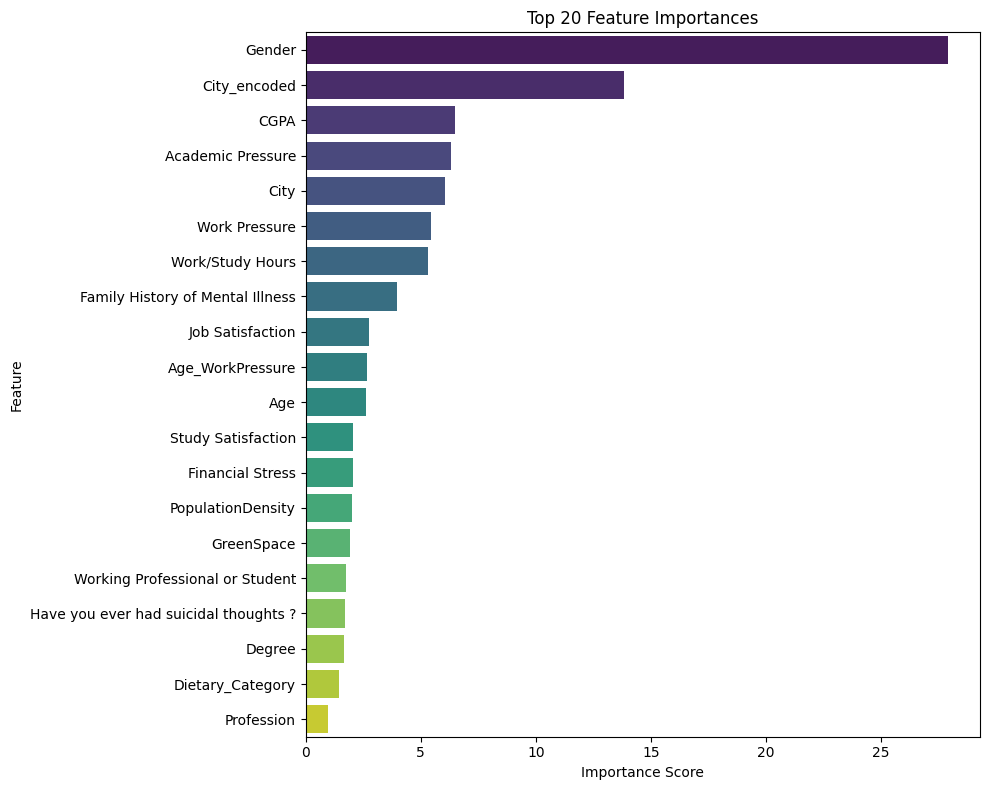

In [169]:
# prompt: feat_importance 시각화

# Get feature importance
feat_importance = model.get_feature_importance()
feat_names = X_train.columns

# Create a pandas Series for easier handling
importance_series = pd.Series(feat_importance, index=feat_names).sort_values(ascending=False)

# Visualize the top N features
top_n = 20 # Adjust N as needed
plt.figure(figsize=(10, 8))
sns.barplot(x=importance_series.head(top_n).values, y=importance_series.head(top_n).index, palette='viridis')
plt.title(f'Top {top_n} Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [170]:
# Define a scoring metric
scoring = make_scorer(accuracy_score)

# Perform cross-validation
cv_scores = cross_val_score(stacking_ensemble, X_train_preprocessed, y_train, cv=5, scoring=scoring)

# Print cross-validation results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation of CV Accuracy: {cv_scores.std():.4f}")

Cross-Validation Scores: [0.94147696 0.94195817 0.94203006 0.94210409 0.94421411]
Mean CV Accuracy: 0.9424
Standard Deviation of CV Accuracy: 0.0010


In [171]:
# Fit the model
stacking_ensemble.fit(X_train_preprocessed, y_train)

# Make predictions
test_preds = stacking_ensemble.predict(X_test_preprocessed)

In [172]:
# Create a DataFrame to hold the submission results
output = pd.DataFrame({'id': test_ids,
                       'class': test_preds})

# Save the output DataFrame to a CSV file
output.to_csv('submission.csv', index=False)

output.head()

,id,class
0,140700,0
1,140701,0
2,140702,0
3,140703,1
4,140704,0
